## Proyecto 3 KNN parte 2

<p>Trataremos un archivo csv descargado previamente con el nombre Train.csv</p>

In [1]:

import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt

df = pd.read_csv('Train.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

La función de arriba nos provee de información acerca de datos perdidos. Podemos ver que la columna Item_Weight tiebe 1463 datos perdidos y la columna Outlet_Size tiene 2410. Entonces, llenaremos esos datos con la media en el caso de Item_Weight y con la moda en el caso de Outlet_Size.

In [4]:
mean = df['Item_Weight'].mean()
mode = df['Outlet_Size'].mode()

In [5]:
df['Item_Weight'].fillna(mean, inplace = True)
df['Outlet_Size'].fillna(mode[0], inplace = True)

C:\Users\Jorge Paz\AppData\Local\Temp\ipykernel_2408\2875675983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean, inplace = True)
C:\Users\Jorge Paz\AppData\Local\Temp\ipykernel_2408\2875675983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Ahora lidiaremos con las columnas categoricas y el id lo borraremos de los datos.

In [7]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)
df = pd.get_dummies(df)

In [8]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


get_dummies nos permitió generar clasificaciones para cada item del dataframe. Son aproximadamente 31 categorias. Usaremos estos datos para entrenar nuestro modelo.

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis = 1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

Utilizaremos un escalado de sklearn llamado MinMaxScaler que nos escalara nuestros datos a valores en el rango de 0 y 1. Luego, los tenemos que volver a pasar a un dataframe con el metodo DataFrame

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

Ahora buscaremos nuestro k que mejor se adapte a unestro metodo de clasificación. 

In [11]:
rmse_val = []
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('El valor RMSE para k = {} es {}'.format(K, error))
    

El valor RMSE para k = 1 es 1505.735488208834
El valor RMSE para k = 2 es 1353.5332564046178
El valor RMSE para k = 3 es 1273.4967329805618
El valor RMSE para k = 4 es 1232.8531143043458
El valor RMSE para k = 5 es 1218.2932915954264
El valor RMSE para k = 6 es 1202.2348831628642
El valor RMSE para k = 7 es 1204.642439844982
El valor RMSE para k = 8 es 1205.0034394729976
El valor RMSE para k = 9 es 1207.6239449455022
El valor RMSE para k = 10 es 1207.3321803953381
El valor RMSE para k = 11 es 1210.6208604487833
El valor RMSE para k = 12 es 1214.093690250019
El valor RMSE para k = 13 es 1215.0984158694625
El valor RMSE para k = 14 es 1216.0451073288975
El valor RMSE para k = 15 es 1216.2609620924143
El valor RMSE para k = 16 es 1218.5561867653778
El valor RMSE para k = 17 es 1221.2508083047478
El valor RMSE para k = 18 es 1227.6652794146917
El valor RMSE para k = 19 es 1231.1948234624504
El valor RMSE para k = 20 es 1239.022597638654


In [12]:
min_value = min(rmse_val)
min_value

1202.2348831628642

<Axes: >

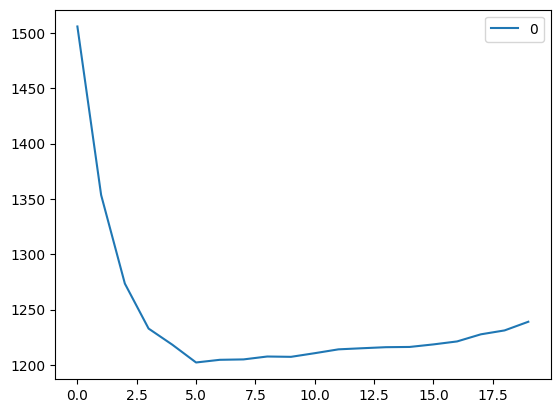

In [13]:
curve = pd.DataFrame(rmse_val)
curve.plot()